Final dataset shape: (1266782, 8)


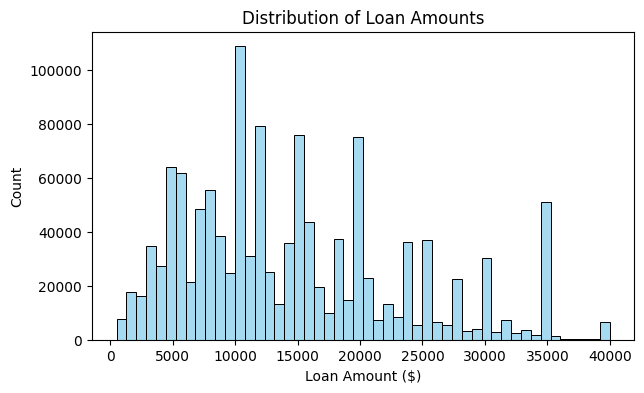

👉 Most loans are clustered around smaller amounts (5k–15k).


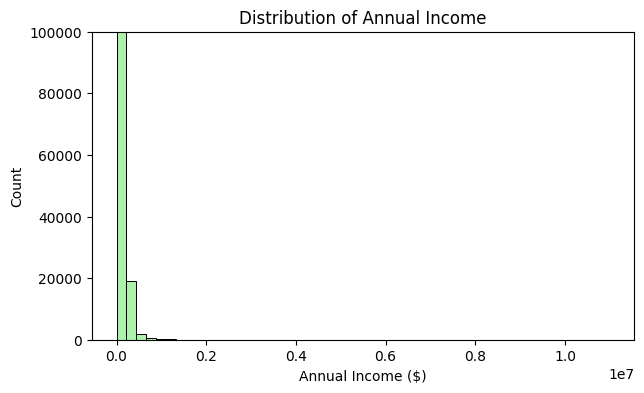

👉 Many applicants have income below $100k, with few very high outliers.


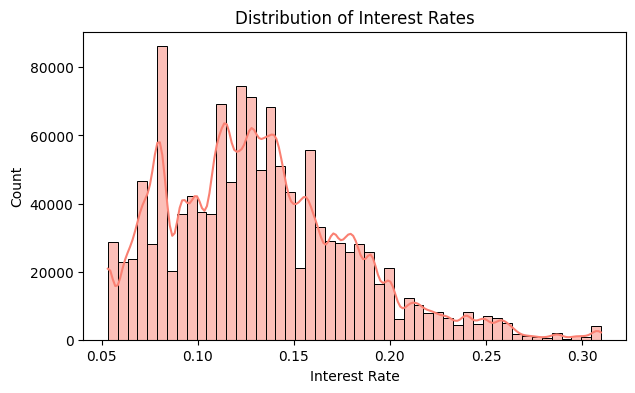

👉 Interest rates mostly fall between 10–20%, which strongly impacts profitability.


C:\Users\Relig\AppData\Local\Temp\ipykernel_7800\1943719106.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ownership_default.index, y=ownership_default.values, palette="viridis")


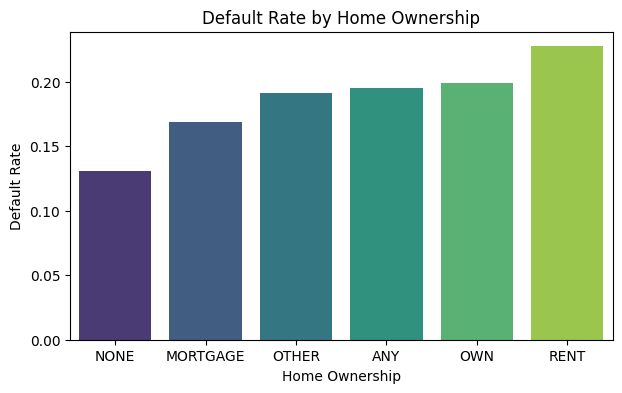

👉 Applicants renting tend to default more than homeowners, so ownership matters.


C:\Users\Relig\AppData\Local\Temp\ipykernel_7800\1943719106.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_default.index, y=purpose_default.values, palette="coolwarm")


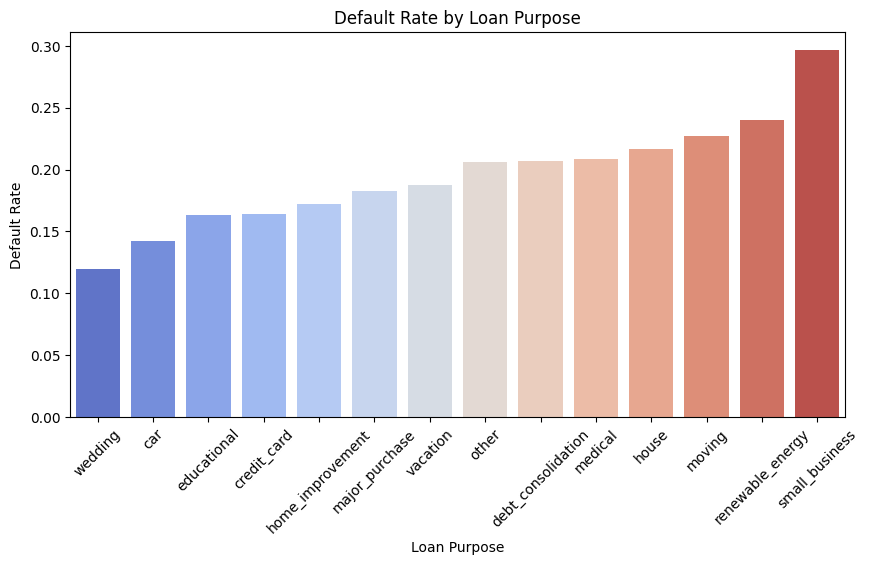

👉 Certain purposes (e.g., small business loans) show higher default risk compared to credit card consolidation.


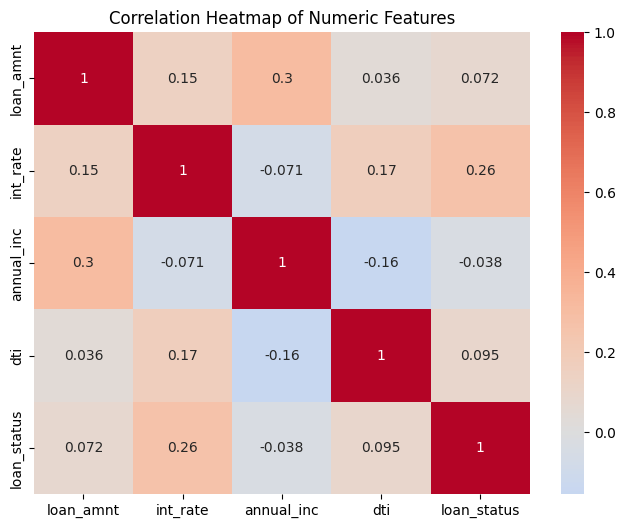

👉 Loan amount and DTI are positively correlated with default, while annual income reduces risk.
Training shape: (1013425, 7)
Test shape: (253357, 7)


In [5]:
# 1_EDA_Preprocessing.ipynb

# -----------------------------
# 1️⃣ IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# -----------------------------
# 2️⃣ LOAD DATA
# -----------------------------
df = pd.read_csv(r"C:\Users\Relig\Downloads\LoanApproval-ML-RL\data\accepted_2007_to_2018.csv", low_memory=False)

# Keep only relevant target classes
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Select subset of features for clarity
features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 
            'emp_length', 'home_ownership', 'purpose']
df = df[features + ['loan_status']].dropna()

# Convert int_rate properly
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%')
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce') / 100.0
df = df.dropna()

print("Final dataset shape:", df.shape)

# =============================
# 3️⃣ TASK 1 – EDA & FEATURE JUSTIFICATION
# =============================

# Histogram: Loan Amount
plt.figure(figsize=(7,4))
sns.histplot(df['loan_amnt'], bins=50, kde=False, color="skyblue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.show()
print("👉 Most loans are clustered around smaller amounts (5k–15k).")

# Histogram: Annual Income
plt.figure(figsize=(7,4))
sns.histplot(df['annual_inc'], bins=50, kde=False, color="lightgreen")
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Count")
plt.ylim(0, 100000)  # cap y-axis for readability
plt.show()
print("👉 Many applicants have income below $100k, with few very high outliers.")

# Histogram: Interest Rate
plt.figure(figsize=(7,4))
sns.histplot(df['int_rate'], bins=50, kde=True, color="salmon")
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate")
plt.ylabel("Count")
plt.show()
print("👉 Interest rates mostly fall between 10–20%, which strongly impacts profitability.")

# Bar Plot: Default rate by Home Ownership
plt.figure(figsize=(7,4))
ownership_default = df.groupby('home_ownership')['loan_status'].mean().sort_values()
sns.barplot(x=ownership_default.index, y=ownership_default.values, palette="viridis")
plt.title("Default Rate by Home Ownership")
plt.ylabel("Default Rate")
plt.xlabel("Home Ownership")
plt.show()
print("👉 Applicants renting tend to default more than homeowners, so ownership matters.")

# Bar Plot: Default rate by Loan Purpose
plt.figure(figsize=(10,5))
purpose_default = df.groupby('purpose')['loan_status'].mean().sort_values()
sns.barplot(x=purpose_default.index, y=purpose_default.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Default Rate by Loan Purpose")
plt.ylabel("Default Rate")
plt.xlabel("Loan Purpose")
plt.show()
print("👉 Certain purposes (e.g., small business loans) show higher default risk compared to credit card consolidation.")

# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df[['loan_amnt','int_rate','annual_inc','dti','loan_status']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
print("👉 Loan amount and DTI are positively correlated with default, while annual income reduces risk.")

# =============================
# 4️⃣ TASK 2/3 – PREPROCESSING FOR MODELS
# =============================

# Handle missing values (already done, but safe check)
df = df.dropna()

# Encode categorical features
for col in ['home_ownership','purpose','emp_length']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Scale numeric features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Train/test split
X = df[features]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

# ✅ Ready for DL/RL model building
